# Data Transform

In this notebook, we will ask you a series of questions to evaluate your findings from your EDA. Based on your response & justification, we will ask you to also apply a subsequent data transformation. 

If you state that you will not apply any data transformations for this step, you must **justify** as to why your dataset/machine-learning does not require the mentioned data preprocessing step.

The bonus step is completely optional, but if you provide a sufficient feature engineering step in this project we will add `1000` points to your Kahoot leaderboard score.

You will write out this transformed dataframe as a `.csv` file to your `data/` folder.

**Note**: Again, note that this dataset is quite large. If you find that some data operations take too long to complete on your machine, simply use the `sample()` method to transform a subset of your data.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import os



## Q1

Does your model contain any missing values or "non-predictive" columns? If so, which adjustments should you take to ensure that your model has good predictive capabilities? Apply your data transformations (if any) in the code-block below.

Based on the coding below, the dataset doesn't contain any misssing values, but it does contain two non-predictive columns: nameOrig & nameDest. They don't carry meaningful data for fraud detection as there are simply users IDs. 

In [28]:
# Loading data
transaction = pd.read_csv('/Users/nogbomoh.if25/Downloads/detect-fraud/data/bank_transactions.csv')
transaction

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0


In [29]:
# Checking for missing values
transaction.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [32]:
# Dropping non-predictive columns
df = transaction.drop(columns=['nameOrig', 'nameDest'],axis=1) 
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0,0


## Q2

Do certain transaction types consistently differ in amount or fraud likelihood? If so, how might you transform the type column to make this pattern usable by a machine learning model? Apply your data transformations (if any) in the code-block below.

After doing some transformations, TRANSFER and CASH_OUT transcations are only ones asscoiated with fraud


In [35]:
df_encoded = pd.get_dummies(
    data = df,
    columns=['type'],
    dtype= 'int',
    drop_first=True
)

df_encoded.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,983.09,36730.24,35747.15,0.00,0.00,0,0,0,0,1,0
1,55215.25,99414.00,44198.75,0.00,0.00,0,0,0,0,1,0
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0,0,0,0,0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0,0,0,0,1
4,67990.14,0.00,0.00,625317.04,693307.19,0,0,1,0,0,0


## Q3

After exploring your data, you may have noticed that fraudulent transactions are rare compared to non-fraudulent ones. What challenges might this pose when training a machine learning model? What strategies could you use to ensure your model learns meaningful patterns from the minority class? Apply your data transformations (if any) in the code-block below.

The number of non-fraudulent transcation outnumber the amount of fraudelent ones. This would cause the machine learning to be bias. It would predict things as non-fraud when there are some fraud ones. Oversampling the minority class and oversampling the majority class can ensure the model learns meaninnful patterns. A class weight adjustment and a Anomaly Detection algorithm can also do the trick. 

In [36]:
transaction['isFraud'].value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

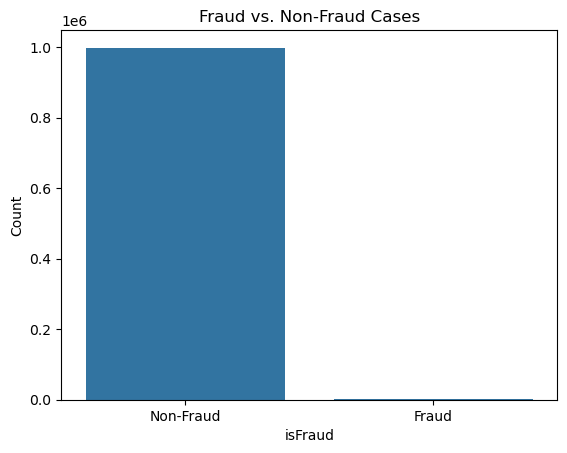

In [37]:
sns.countplot(x='isFraud', data = transaction)
plt.title('Fraud vs. Non-Fraud Cases')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df_encoded.drop(columns=['isFraud', 'nameOrg', 'nameDest'], errors= 'ignore')
y = df_encoded['isFraud']

In [43]:
scaler= MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify= y, test_size= 0.3, random_state= 42)
smote = SMOTE(random_state= 42)
X_resample , y_resample = smote.fit_resample(X, y)

In [46]:
print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {y_resample.value_counts()}")

Before SMOTE: isFraud
0    699092
1       908
Name: count, dtype: int64
After SMOTE: isFraud
0    998703
1    998703
Name: count, dtype: int64


## Bonus (optional)

Are there interaction effects between variables (e.g., fraud and high amount and transaction type) that aren't captured directly in the dataset? Would it be helpful to manually engineer any new features that reflect these interactions? Apply your data transformations (if any) in the code-block below.

Answer Here

In [2]:
# write out newly transformed dataset to your folder
...